In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Duplicate key in file '/Users/shashank/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


In [2]:
#converts lists into tuples
def convert(list):
    return tuple(list)

In [3]:
#loads and stores data from json file
import json
f = open('/Users/shashank/Documents/Coursework/Spring_2021/Autonomous_Systems/data.json',)


data = json.load(f)


for i in data['nodes']:
    print(i)
  
f.close()

{'id': 'A', 'level': 'HIGH', 'pi': '1000'}
{'id': 'B', 'level': 'LOW', 'pi': '2'}
{'id': 'C', 'level': 'MED', 'pi': '1000'}
{'id': 'D', 'level': 'HIGH', 'pi': '1000'}
{'id': 'E', 'level': 'HIGH', 'pi': '1000'}
{'id': 'F', 'level': 'LOW', 'pi': '4'}
{'id': 'G', 'level': 'LOW', 'pi': '3'}
{'id': 'H', 'level': 'LOW', 'pi': '1'}
{'id': 'I', 'level': 'MED', 'pi': '1000'}
{'id': 'J', 'level': 'MED', 'pi': '1000'}
{'id': 'K', 'level': 'HIGH', 'pi': '1000'}


In [4]:
#converts lists of edges into tuples
edgesss = []
z = 0
length = len(data['edgess'])
for i in data['edgess']:
    temp = convert(data['edgess'][z])
    edgesss.append(temp)
    z = z+1
print(edgesss)

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'F'), ('F', 'G'), ('G', 'B'), ('B', 'I'), ('I', 'E'), ('C', 'H'), ('G', 'H'), ('H', 'J'), ('F', 'J'), ('H', 'E'), ('B', 'A'), ('C', 'B'), ('D', 'C'), ('F', 'A'), ('G', 'F'), ('B', 'G'), ('I', 'B'), ('E', 'I'), ('H', 'C'), ('H', 'G'), ('J', 'H'), ('J', 'F'), ('E', 'H'), ('D', 'K'), ('K', 'D'), ('J', 'K'), ('K', 'J')]


In [5]:
#Creates a graphical representation of network of nodes
G = nx.DiGraph()
G.add_edges_from(edgesss)

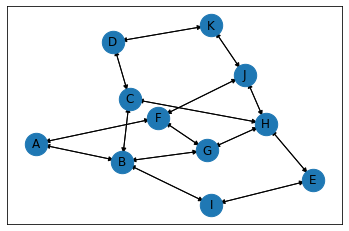

In [6]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=500)
nx.draw_networkx_edges(G,pos,edgelist=G.edges(),edge_color='black')
nx.draw_networkx_labels(G,pos)
plt.show
plt.savefig('/Users/shashank/Documents/Coursework/Spring_2021/Autonomous_Systems/graph.png')

In [7]:
#Sorts nodes based on water level
node_level = {
    "node":[],
    "level":[]
}
high = []
low = []
pihi = []
pilo = []
pimed = []
med = []
j = 0

for i in data['nodes']:
    node_level['node'].append(i['id'])
    node_level['level'].append(i['level'])

print(node_level)
for i in data['nodes']:
    if i['level'] == "HIGH":
        high.append(i['id'])
        pihi.append(i['pi'])
        
for i in data['nodes']:
    if i['level'] == "LOW":
        low.append(i['id'])
        pilo.append(i['pi'])
        
        
for i in data['nodes']:
    if i['level'] == "MED":
        med.append(i['id'])
        pimed.append(i['pi'])

print(high)
print(low)
print(pilo)
print(med)

{'node': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'], 'level': ['HIGH', 'LOW', 'MED', 'HIGH', 'HIGH', 'LOW', 'LOW', 'LOW', 'MED', 'MED', 'HIGH']}
['A', 'D', 'E', 'K']
['B', 'F', 'G', 'H']
['2', '4', '3', '1']
['C', 'I', 'J']


In [8]:
#sorts low nodes based on priority index
length = len(low)
l = 0
LOW = ['A']  * length
for k in pilo:
    j = int(k)
    LOW[j-1] = low[l]
    l = l+1
print(LOW)   

['H', 'B', 'G', 'F']


In [9]:
#Performing the dijkstra algorithm to find the shortest path
from dijkstra import Graph,DijkstraSPF

In [10]:
graph = Graph()

for i in data['edges']:
    graph.add_edge(i[0],i[1],i[2])
    
highs = []
nodes = A,B,C,D,E,F,G,H,I,J,K = list("ABCDEFGHIJK")
for i in high:
    highs.append(i)

In [11]:
#Finding the nearest HIGH node to the LOW node
flow = []
for i in range(length):
    dijkstra = DijkstraSPF(graph, LOW[i])
    print("%-5s %-5s from %-5s" % ("Node", "Distance", LOW[i]))
    dict_n = {
        "Node":[],
        "Distance":[]
    };
    for u in highs:
        dist = dijkstra.get_distance(u)
        dict_n["Node"].append(u)
        dict_n["Distance"].append(dist)
        print("%-5s %d" % (u, dist))
    length1 = len(dict_n["Node"])
    a = dict_n["Distance"][0]
    b = dict_n["Node"][0]
    for i in range(length1):
        if dict_n["Distance"][i] < a :
            a = dict_n["Distance"][i]
            b = dict_n["Node"][i]

    print(b,a)
    c = dijkstra.get_path(b)
    print(c)
    flow.append(c)
    print(" <- ".join(dijkstra.get_path(b)))
    highs.remove(b)
    med.append(b)

Node  Distance from H    
A     34
D     34
E     15
K     47
E 15
['H', 'E']
H <- E
Node  Distance from B    
A     10
D     20
K     43
A 10
['B', 'A']
B <- A
Node  Distance from G    
D     45
K     57
D 45
['G', 'B', 'C', 'D']
G <- B <- C <- D
Node  Distance from F    
K     52
K 52
['F', 'J', 'K']
F <- J <- K


In [12]:
for i in flow:
    print("<-".join(i))
print("<-".join(flow[0]))

H<-E
B<-A
G<-B<-C<-D
F<-J<-K
H<-E


In [13]:
import tkinter as tk
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)

In [ ]:
root = tk.Tk()
root.title('Smart Water Distribution Network')
root.geometry("500x450")
canvas = Canvas(width = 450,height = 300 , bg = 'white')
canvas.pack()
photo = PhotoImage(file = '/Users/shashank/Documents/Coursework/Spring_2021/Autonomous_Systems/graph.png')
canvas.create_image(0,0,image = photo , anchor = NW)
text_1 = Text(root,height = 20,width = 50)
text_1.config(state = "normal")
text_1.insert(tk.INSERT,"WATER FLOWS IN THE FOLLOWING PATHS\n\n")
for i in flow:
    t = "<-".join(i) + "\n"
    text_1.insert(tk.INSERT,t)

text_1.config(state="disabled")
text_1.pack()

root.mainloop()